In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [11]:
df = pd.read_csv("output_final.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dataset  41 non-null     object
 1   aco-3    41 non-null     object
 2   aco-5    41 non-null     object
 3   aco-10   41 non-null     object
 4   aco-avg  41 non-null     object
 5   ga-3     41 non-null     object
 6   ga-5     41 non-null     object
 7   ga-10    41 non-null     object
 8   ga-avg   41 non-null     object
 9   slm-3    41 non-null     object
 10  slm-5    41 non-null     object
 11  slm-10   41 non-null     object
 12  slm-avg  41 non-null     object
dtypes: object(13)
memory usage: 4.3+ KB


In [12]:
for s in df.columns[1:]:
    df[s] = df[s].str.strip("(s)")
    df[[s + "-cost", s + "-time"]] = df[s].str.split(" ", n=1, expand=True)
    df[s + "-cost"] = pd.to_numeric(df[s + "-cost"])
    df[s + "-time"] = pd.to_numeric(df[s + "-time"])
    df = df.drop(columns=[s])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dataset       41 non-null     object 
 1   aco-3-cost    41 non-null     float64
 2   aco-3-time    41 non-null     float64
 3   aco-5-cost    41 non-null     float64
 4   aco-5-time    41 non-null     float64
 5   aco-10-cost   41 non-null     float64
 6   aco-10-time   41 non-null     float64
 7   aco-avg-cost  41 non-null     float64
 8   aco-avg-time  41 non-null     float64
 9   ga-3-cost     41 non-null     float64
 10  ga-3-time     41 non-null     float64
 11  ga-5-cost     41 non-null     float64
 12  ga-5-time     41 non-null     float64
 13  ga-10-cost    41 non-null     float64
 14  ga-10-time    41 non-null     float64
 15  ga-avg-cost   41 non-null     float64
 16  ga-avg-time   41 non-null     float64
 17  slm-3-cost    41 non-null     float64
 18  slm-3-time    41 non-null     fl

In [43]:
dfSubset = df[df["dataset"].isin(["eil51", "st70", "eil76", "rat99", "ch130", "ch150", "rat195", "gil262", "a280", "rd400"])]

In [44]:
dfCost = dfSubset[["dataset"] + [c for c in dfSubset.columns if c.endswith("cost") and "avg" not in c]]
dfCost = dfCost.melt("dataset", var_name="cols", value_name="vals")

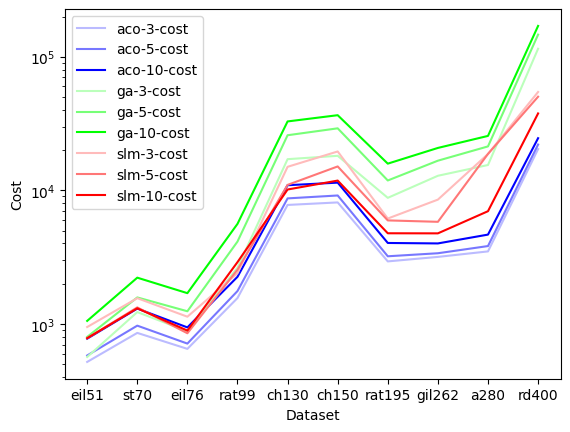

In [56]:
palette = sns.color_palette(["#bbf", "#77f", "#00f", "#bfb", "#7f7", "#0f0", "#fbb", "#f77", "#f00"])
sns.lineplot(data=dfCost, x="dataset", y="vals", hue="cols", palette=palette)
plt.yscale("log")
plt.xlabel("Dataset")
plt.ylabel("Cost")
plt.legend(loc="upper left")
plt.show()

In [54]:
dfTime = dfSubset[["dataset"] + [c for c in dfSubset.columns if c.endswith("time") and "avg" not in c]]
dfTime = dfTime.melt("dataset", var_name="cols", value_name="vals")

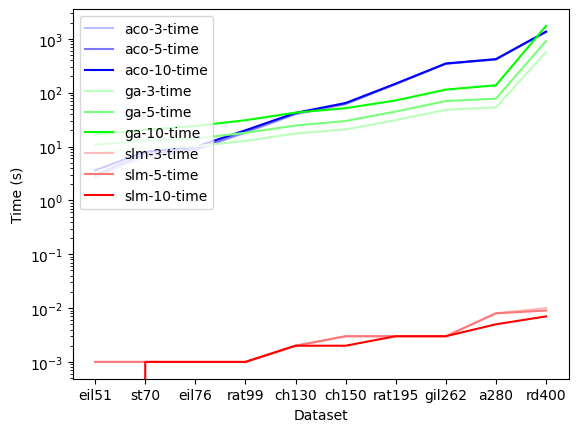

In [58]:
sns.lineplot(data=dfTime, x="dataset", y="vals", hue="cols", palette=palette)
plt.yscale("log")
plt.xlabel("Dataset")
plt.ylabel("Time (s)")
plt.legend(loc="upper left")
plt.show()

In [70]:
acoCostCompare = (df["slm-avg-cost"] / df["aco-avg-cost"]).mean()
gaCostCompare = (df["slm-avg-cost"] / df["ga-avg-cost"]).mean()
print(f"SLM average cost is {acoCostCompare} times as high as ACO")
print(f"SLM average cost is {gaCostCompare} times as high as GA")

acoCostCompare = (df["slm-avg-cost"] / df["aco-avg-cost"]).median()
gaCostCompare = (df["slm-avg-cost"] / df["ga-avg-cost"]).median()
print(f"SLM median cost is {acoCostCompare} times as high as ACO")
print(f"SLM median cost is {gaCostCompare} times as high as GA")

SLM average cost is 1.6233475861619708 times as high as ACO
SLM average cost is 0.5114707783278356 times as high as GA
SLM median cost is 1.4508537330759457 times as high as ACO
SLM median cost is 0.4753847147490262 times as high as GA


In [71]:
acoTimeCompare = (df["slm-avg-time"] / df["aco-avg-time"]).mean()
gaTimeCompare = (df["slm-avg-time"] / df["ga-avg-time"]).mean()
print(f"SLM average execution time is {acoTimeCompare} times as long as ACO")
print(f"SLM average execution time is {gaTimeCompare} times as long as GA")

acoTimeCompare = (df["slm-avg-time"] / df["aco-avg-time"]).median()
gaTimeCompare = (df["slm-avg-time"] / df["ga-avg-time"]).median()
print(f"SLM median execution time is {acoTimeCompare} times as long as ACO")
print(f"SLM median execution time is {gaTimeCompare} times as long as GA")

SLM average execution time is 5.137243633507618e-05 times as long as ACO
SLM average execution time is 5.65341438712056e-05 times as long as GA
SLM median execution time is 3.224610225239024e-05 times as long as ACO
SLM median execution time is 5.830053927998834e-05 times as long as GA
